In [1]:
# Cell 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
file_path = "ppo_evaluations.npz"
file_path = "goal_evaluations.npz"
# file_path = "SAC_evaluations.npz"

In [3]:
# Cell 2: Load and understand the multi-episode evaluation data
def load_and_explain_npz(file_path):
    """
    Load and explain the evaluation data structure
    """
    data = np.load(file_path)
    
    print("🎯 UNDERSTANDING YOUR PPO EVALUATION DATA")
    print("=" * 60)
    print("Configuration: 20 evaluation points × 5 episodes each")
    print("\n📊 Data Structure:")
    print(f"timesteps: (20,)    - Evaluation checkpoints [5000, 10000, ..., 100000]")
    print(f"results:   (20, 5)  - Rewards for 5 episodes at each evaluation")
    print(f"ep_lengths: (20, 5) - Lengths for 5 episodes at each evaluation")
    
    timesteps = data['timesteps']
    results = data['results']
    ep_lengths = data['ep_lengths']
    
    print(f"\n📈 Sample from first evaluation (timestep {timesteps[0]}):")
    print(f"Rewards: {results[0]}")
    print(f"Episode lengths: {ep_lengths[0]}")
    
    print(f"\n📈 Sample from last evaluation (timestep {timesteps[-1]}):")
    print(f"Rewards: {results[-1]}")
    print(f"Episode lengths: {ep_lengths[-1]}")
    
    return data, timesteps, results, ep_lengths


data, timesteps, results, ep_lengths = load_and_explain_npz(file_path)

🎯 UNDERSTANDING YOUR PPO EVALUATION DATA
Configuration: 20 evaluation points × 5 episodes each

📊 Data Structure:
timesteps: (20,)    - Evaluation checkpoints [5000, 10000, ..., 100000]
results:   (20, 5)  - Rewards for 5 episodes at each evaluation
ep_lengths: (20, 5) - Lengths for 5 episodes at each evaluation

📈 Sample from first evaluation (timestep 930000):
Rewards: [-1433.83070564 -1965.59131026 -1465.41946912 -1725.21302366
 -1396.59441757]
Episode lengths: [300 300 300 300 300]

📈 Sample from last evaluation (timestep 1725000):
Rewards: [ -852.12145758  -914.22065377 -1195.36517227  -802.6726476
  -745.04233289]
Episode lengths: [159 156 196 149 144]


In [4]:
# Cell 3: Create comprehensive analysis DataFrames
print("📋 Creating Analysis DataFrames...")

# Create a detailed DataFrame with all episodes
episode_data = []
for i, timestep in enumerate(timesteps):
    for j in range(results.shape[1]):
        episode_data.append({
            'evaluation_point': i,
            'timestep': timestep,
            'episode_num': j,
            'reward': results[i, j],
            'episode_length': ep_lengths[i, j]
        })

df_detailed = pd.DataFrame(episode_data)
print("Detailed DataFrame (all episodes):")
display(df_detailed.head(10))

# Create summary statistics at each evaluation point
summary_data = []
for i, timestep in enumerate(timesteps):
    summary_data.append({
        'timestep': timestep,
        'mean_reward': np.mean(results[i]),
        'std_reward': np.std(results[i]),
        'min_reward': np.min(results[i]),
        'max_reward': np.max(results[i]),
        'mean_length': np.mean(ep_lengths[i]),
        'std_length': np.std(ep_lengths[i])
    })

df_summary = pd.DataFrame(summary_data)
print("\nSummary DataFrame (per evaluation point):")
display(df_summary)

data.close()

📋 Creating Analysis DataFrames...
Detailed DataFrame (all episodes):


,evaluation_point,timestep,episode_num,reward,episode_length
0,0,930000,0,-1433.830706,300
1,0,930000,1,-1965.591310,300
2,0,930000,2,-1465.419469,300
3,0,930000,3,-1725.213024,300
4,0,930000,4,-1396.594418,300
5,1,935000,0,-1492.892236,300
6,1,935000,1,-1375.666315,300
7,1,935000,2,-1580.170836,300
8,1,935000,3,-1911.437013,300
9,1,935000,4,-1437.661173,300



Summary DataFrame (per evaluation point):


,timestep,mean_reward,std_reward,min_reward,max_reward,mean_length,std_length
0,930000,-1597.329785,217.438562,-1965.591310,-1396.594418,300.0,0.000000
1,935000,-1559.565515,188.341732,-1911.437013,-1375.666315,300.0,0.000000
2,940000,-1703.027733,141.440432,-1932.535366,-1516.817064,300.0,0.000000
3,945000,-1417.184661,74.064640,-1506.594113,-1297.333795,300.0,0.000000
4,950000,-1897.189769,760.455483,-3250.411140,-1192.111489,300.0,0.000000
...,...,...,...,...,...,...,...
155,1705000,-849.322583,114.084991,-996.959065,-732.877545,148.8,10.419213
156,1710000,-1106.739434,162.861753,-1336.463479,-894.811098,185.0,24.124676
157,1715000,-893.712935,116.520975,-1079.744826,-728.640619,157.0,11.541230
158,1720000,-865.928499,118.053408,-1076.847893,-731.711579,156.2,13.673332


📈 Visualizing Multi-Episode Evaluation Results


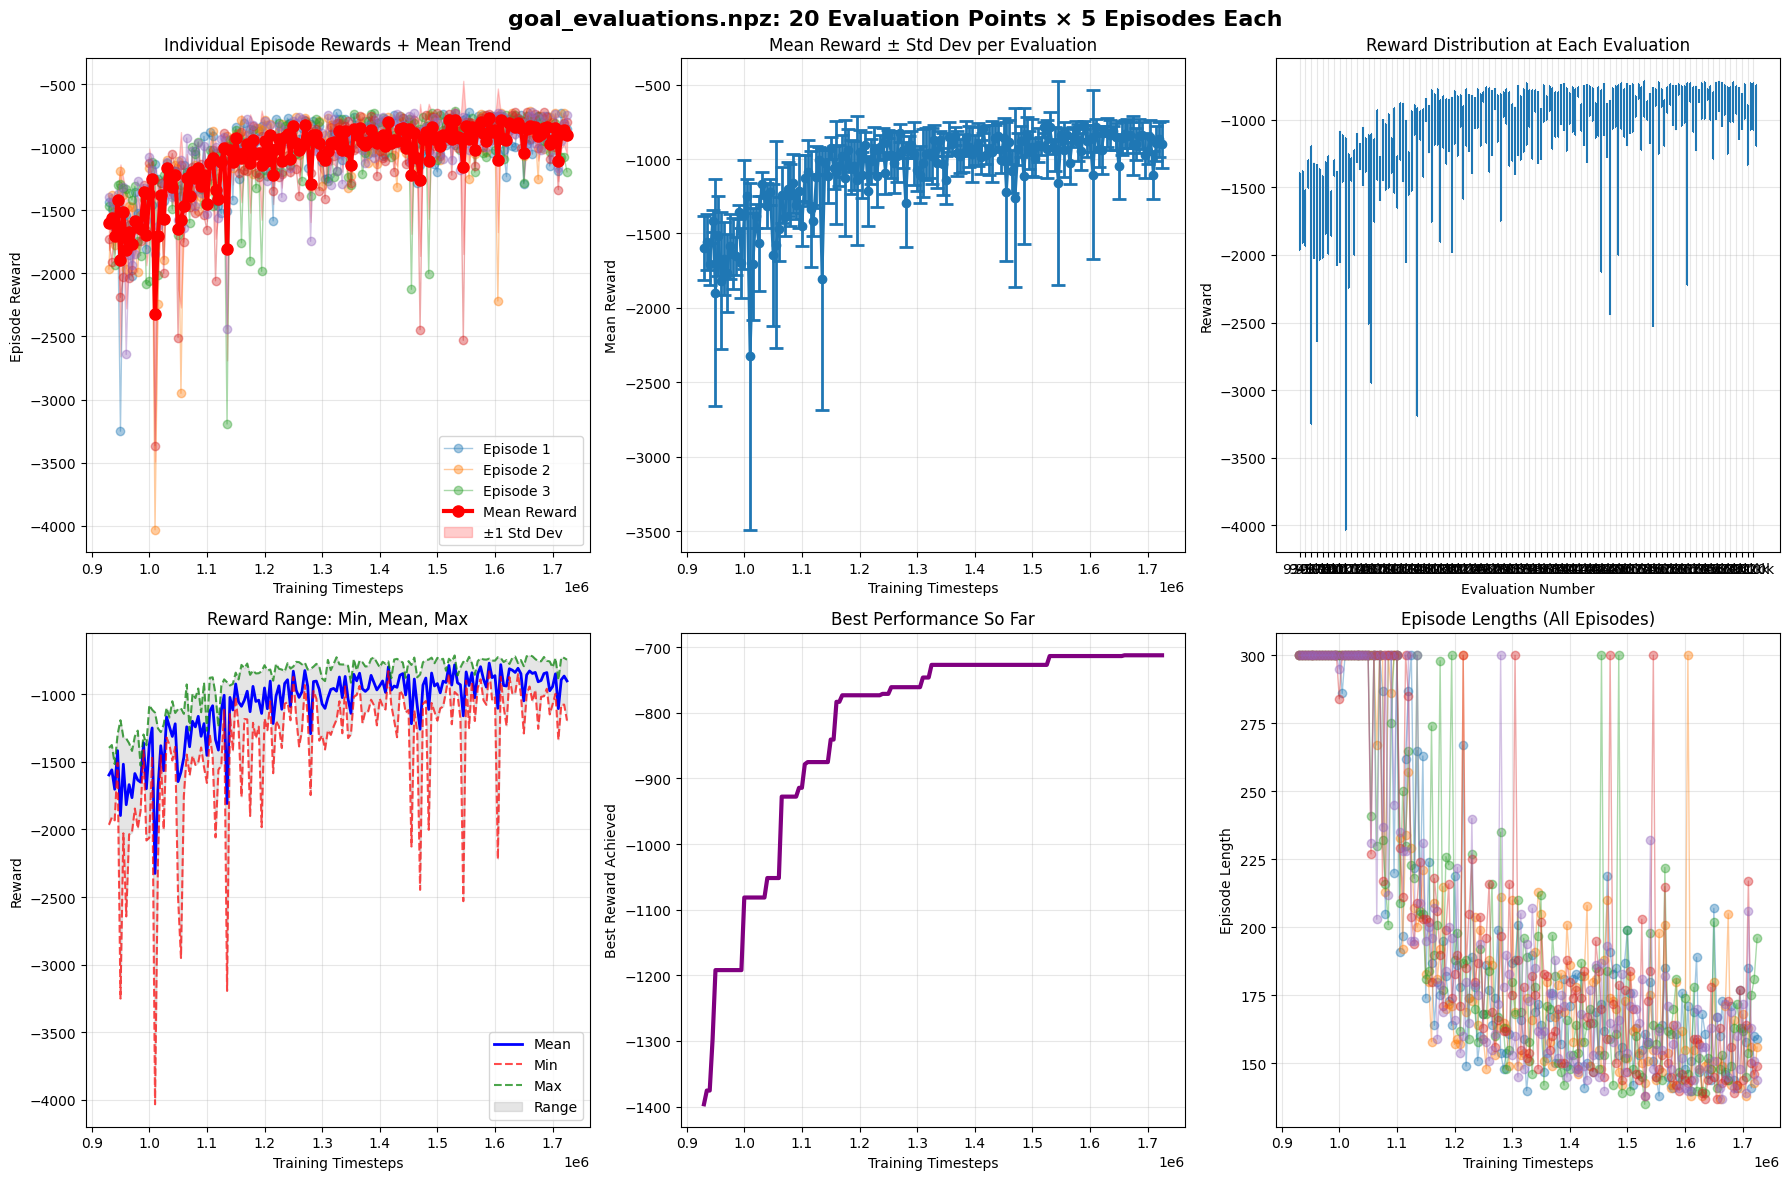

In [5]:
# Cell 4: Visualize the multi-episode evaluation results
print("📈 Visualizing Multi-Episode Evaluation Results")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle( file_path + ': 20 Evaluation Points × 5 Episodes Each', fontsize=16, fontweight='bold')

# Plot 1: All individual episodes with mean trend
for j in range(5):
    axes[0, 0].plot(timesteps, results[:, j], 'o-', alpha=0.4, linewidth=1, 
                   label=f'Episode {j+1}' if j < 3 else "")

# Plot mean and std
axes[0, 0].plot(df_summary['timestep'], df_summary['mean_reward'], 'ro-', 
               linewidth=3, markersize=8, label='Mean Reward')
axes[0, 0].fill_between(df_summary['timestep'], 
                       df_summary['mean_reward'] - df_summary['std_reward'],
                       df_summary['mean_reward'] + df_summary['std_reward'],
                       alpha=0.2, color='red', label='±1 Std Dev')

axes[0, 0].set_title('Individual Episode Rewards + Mean Trend')
axes[0, 0].set_xlabel('Training Timesteps')
axes[0, 0].set_ylabel('Episode Reward')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Just the mean trend with confidence intervals
axes[0, 1].errorbar(df_summary['timestep'], df_summary['mean_reward'], 
                   yerr=df_summary['std_reward'], fmt='o-', 
                   capsize=5, capthick=2, linewidth=2)
axes[0, 1].set_title('Mean Reward ± Std Dev per Evaluation')
axes[0, 1].set_xlabel('Training Timesteps')
axes[0, 1].set_ylabel('Mean Reward')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Reward distribution over time (violin plot)
violin_data = [results[i] for i in range(len(timesteps))]
positions = range(len(timesteps))

axes[0, 2].violinplot(violin_data, positions=positions, showmeans=True)
axes[0, 2].set_title('Reward Distribution at Each Evaluation')
axes[0, 2].set_xlabel('Evaluation Number')
axes[0, 2].set_ylabel('Reward')
axes[0, 2].set_xticks(positions[::2])
axes[0, 2].set_xticklabels([f'{t//1000}k' for t in timesteps[::2]])
axes[0, 2].grid(True, alpha=0.3)

# Plot 4: Min/Max/Mean rewards
axes[1, 0].plot(df_summary['timestep'], df_summary['mean_reward'], 'b-', label='Mean', linewidth=2)
axes[1, 0].plot(df_summary['timestep'], df_summary['min_reward'], 'r--', label='Min', alpha=0.7)
axes[1, 0].plot(df_summary['timestep'], df_summary['max_reward'], 'g--', label='Max', alpha=0.7)
axes[1, 0].fill_between(df_summary['timestep'], df_summary['min_reward'], df_summary['max_reward'], 
                       alpha=0.2, color='gray', label='Range')
axes[1, 0].set_title('Reward Range: Min, Mean, Max')
axes[1, 0].set_xlabel('Training Timesteps')
axes[1, 0].set_ylabel('Reward')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 5: Learning progress - cumulative max
best_so_far = [np.max(results[:i+1]) for i in range(len(results))]
axes[1, 1].plot(df_summary['timestep'], best_so_far, 'purple', linewidth=3)
axes[1, 1].set_title('Best Performance So Far')
axes[1, 1].set_xlabel('Training Timesteps')
axes[1, 1].set_ylabel('Best Reward Achieved')
axes[1, 1].grid(True, alpha=0.3)

# Plot 6: Episode lengths (all are 150, but let's verify)
for j in range(5):
    axes[1, 2].plot(timesteps, ep_lengths[:, j], 'o-', alpha=0.4, linewidth=1)

axes[1, 2].set_title('Episode Lengths (All Episodes)')
axes[1, 2].set_xlabel('Training Timesteps')
axes[1, 2].set_ylabel('Episode Length')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [6]:
# Cell 5: Statistical analysis and insights
print("🔍 Statistical Analysis and Insights")
print("=" * 50)

# Calculate overall statistics
print("📊 Overall Statistics (across all 100 episodes):")
print(f"Mean reward: {np.mean(results):.2f} ± {np.std(results):.2f}")
print(f"Min reward: {np.min(results):.2f}")
print(f"Max reward: {np.max(results):.2f}")
print(f"Reward range: {np.ptp(results):.2f}")

# Calculate improvement
initial_perf = np.mean(results[0])  # First evaluation
final_perf = np.mean(results[-1])   # Last evaluation
improvement = final_perf - initial_perf

print(f"\n📈 Learning Progress:")
print(f"Initial performance (5k steps): {initial_perf:.2f}")
print(f"Final performance (100k steps): {final_perf:.2f}")
print(f"Absolute improvement: {improvement:.2f}")
print(f"Relative improvement: {improvement/abs(initial_perf)*100:.1f}%")

# Consistency analysis
print(f"\n🎯 Performance Consistency:")
consistency = np.mean([np.std(results[i]) for i in range(len(results))])
print(f"Average std dev across evaluations: {consistency:.2f}")
print(f"Most consistent evaluation: std = {np.min([np.std(results[i]) for i in range(len(results))]):.2f}")
print(f"Least consistent evaluation: std = {np.max([np.std(results[i]) for i in range(len(results))]):.2f}")

# Find best evaluation point
best_eval_idx = np.argmax(df_summary['mean_reward'])
print(f"\n🏆 Best evaluation: #{best_eval_idx + 1} at {df_summary.iloc[best_eval_idx]['timestep']} timesteps")
print(f"   Mean reward: {df_summary.iloc[best_eval_idx]['mean_reward']:.2f}")

🔍 Statistical Analysis and Insights
📊 Overall Statistics (across all 100 episodes):
Mean reward: -1082.89 ± 366.34
Min reward: -4032.05
Max reward: -712.30
Reward range: 3319.75

📈 Learning Progress:
Initial performance (5k steps): -1597.33
Final performance (100k steps): -901.88
Absolute improvement: 695.45
Relative improvement: 43.5%

🎯 Performance Consistency:
Average std dev across evaluations: 180.07
Most consistent evaluation: std = 23.23
Least consistent evaluation: std = 1165.95

🏆 Best evaluation: #133 at 1590000.0 timesteps
   Mean reward: -770.23


In [7]:
# Cell 6: Interactive exploration commands
print("💻 Interactive Exploration Commands")
print("=" * 50)
print("""
# Access specific evaluation points:
df_summary[df_summary['timestep'] == 50000]    # Look at specific timestep
df_detailed[df_detailed['evaluation_point'] == 0]  # Look at first evaluation

# Find episodes with best/worst performance:
best_episode = df_detailed.loc[df_detailed['reward'].idxmax()]
worst_episode = df_detailed.loc[df_detailed['reward'].idxmin()]

# Check if learning is stable:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df_summary['timestep'], df_summary['mean_reward'])
print(f"Learning trend slope: {slope:.4f} (positive = improving)")

# Create custom analyses:
last_5_evals = df_summary.tail(5)
print(f"Last 5 evaluations mean: {last_5_evals['mean_reward'].mean():.2f}")
""")

💻 Interactive Exploration Commands

# Access specific evaluation points:
df_summary[df_summary['timestep'] == 50000]    # Look at specific timestep
df_detailed[df_detailed['evaluation_point'] == 0]  # Look at first evaluation

# Find episodes with best/worst performance:
best_episode = df_detailed.loc[df_detailed['reward'].idxmax()]
worst_episode = df_detailed.loc[df_detailed['reward'].idxmin()]

# Check if learning is stable:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df_summary['timestep'], df_summary['mean_reward'])
print(f"Learning trend slope: {slope:.4f} (positive = improving)")

# Create custom analyses:
last_5_evals = df_summary.tail(5)
print(f"Last 5 evaluations mean: {last_5_evals['mean_reward'].mean():.2f}")

